In [12]:
from tensorflow.keras.datasets import mnist
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
x = np.concatenate([train_images, test_images]).reshape(-1, 28*28).astype(np.float32) / 255.0
y = np.concatenate([train_labels, test_labels])

In [14]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [15]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

tnse = TSNE(n_components=3, perplexity=40, verbose=0)
x_tnse = tnse.fit_transform(x)

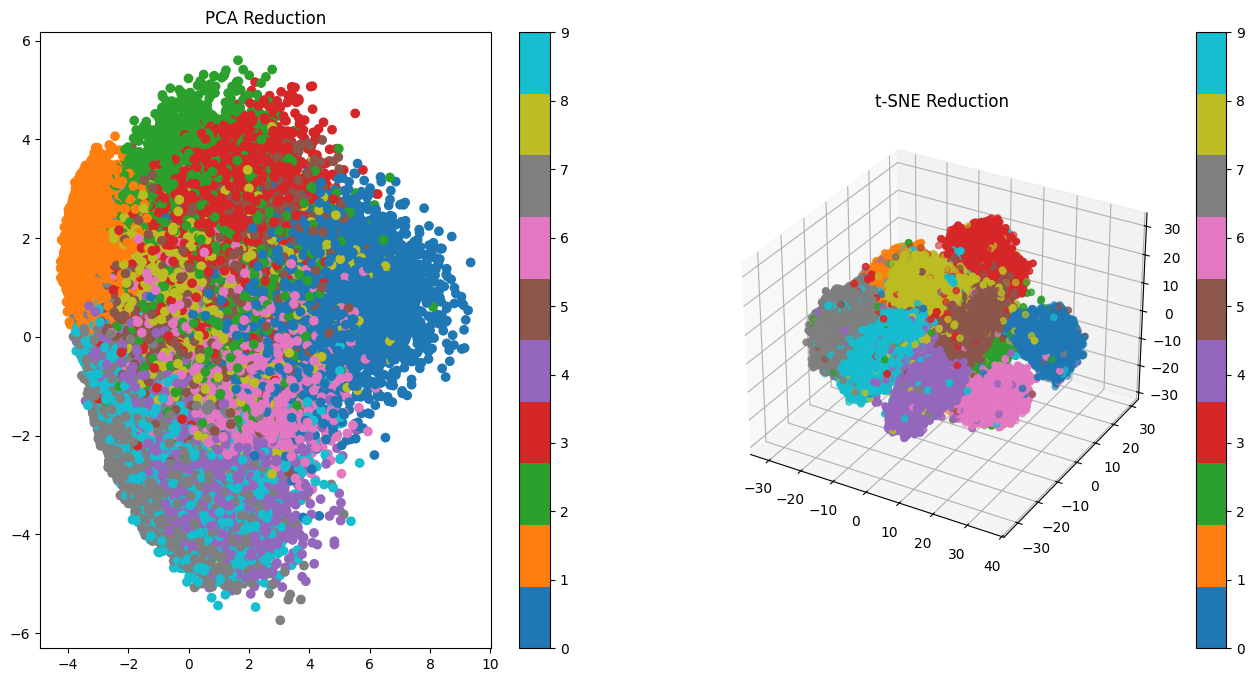

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PCA Visualization (2D since x_pca has only 2 components)
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
scatter = ax.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='tab10')
plt.colorbar(scatter, ax=ax)
ax.set_title('PCA Reduction')

# t-SNE Visualization
ax = fig.add_subplot(122, projection='3d')
scatter = ax.scatter(x_tnse[:, 0], x_tnse[:, 1], x_tnse[:, 2], c=y, cmap='tab10')
plt.colorbar(scatter, ax=ax)
ax.set_title('t-SNE Reduction')
plt.show()